## Physics 3800 - Gaussian Integration

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
sp.init_printing(use_latex='mathjax')
from ipywidgets import interactive, fixed

from scipy.special import *
import scipy.integrate as integrate

### Legendre Polynomial Coefficients

In [2]:
legendre(4)

poly1d([ 4.37500000e+00,  4.85722573e-16, -3.75000000e+00,  2.42861287e-16,
        3.75000000e-01])

### Graphs of Legendre Polynomials

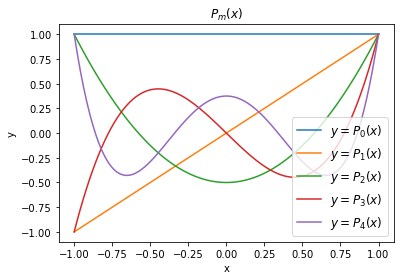

In [3]:
x = np.linspace(-1,1,100)

plt.title(f'$P_m(x)$')

for m in range(5):
    y = eval_legendre(m, x)
    plt.plot(x,y, label=f'$y=P_{m}(x)$')

plt.legend(fontsize=12)
plt.xlabel('x')

plt.ylabel('y')
plt.show()

### Roots

In [5]:
roots, weights = roots_legendre(4)
roots

array([-0.86113631, -0.33998104,  0.33998104,  0.86113631])

In [6]:
eval_legendre(4,roots)

array([ 0.00000000e+00,  5.55111512e-17,  5.55111512e-17, -5.55111512e-17])

### Construct matrix 

Each row $n$ ($n = 0$ to 3) is $P_n(x)$ evaluated at each of the four roots of $P_4(x)$.  Also need inverse of $P$, $P^{-1}$, and the weights, which are the first row of $2 P^{-1}$.  We compare this with what the *scipy* function *roots_legendre* reports as the weights for Gauss-Legendre integration.

In [7]:
P = np.eye(4,4)

for n in range(4):
    P[n]=eval_legendre(n,roots)
    
P = np.transpose(P)
P

array([[ 1.        , -0.86113631,  0.61233362, -0.30474698],
       [ 1.        , -0.33998104, -0.32661934,  0.411728  ],
       [ 1.        ,  0.33998104, -0.32661934, -0.411728  ],
       [ 1.        ,  0.86113631,  0.61233362,  0.30474698]])

In [8]:
Pinv = np.linalg.inv(P)
Pinv

array([[ 0.17392742,  0.32607258,  0.32607258,  0.17392742],
       [-0.44932566, -0.33257549,  0.33257549,  0.44932566],
       [ 0.53250804, -0.53250804, -0.53250804,  0.53250804],
       [-0.371027  ,  0.93977247, -0.93977247,  0.371027  ]])

In [9]:
w = 2*Pinv[0]
w

array([0.34785485, 0.65214515, 0.65214515, 0.34785485])

In [10]:
weights

array([0.34785485, 0.65214515, 0.65214515, 0.34785485])

### Integrate a function

A function that can be well fit with a polynomial of order $2n-1 = 2(4)-1 = 7$.  Use library function to calculate integral and compare with Gauss-Legendre method.

In [11]:
def f(x):
    return np.exp(-x)*np.sin(3*x)


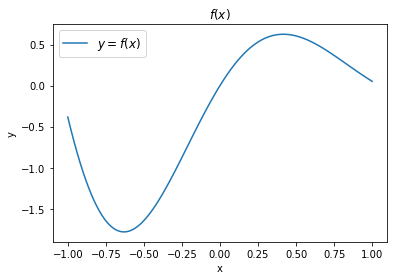

In [12]:
x = np.linspace(-1,1,100)

plt.title(f'$f(x)$')

y = f(x)
plt.plot(x,y, label=f'$y=f(x)$')

plt.legend(fontsize=12)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

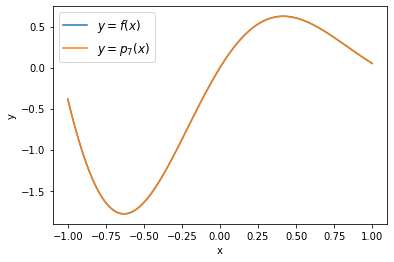

In [13]:
p7=np.polyfit(x,y,7)
ypoly7=np.polyval(p7,x)

plt.plot(x,y, label=f'$y=f(x)$')
plt.plot(x,ypoly7, label=f'$y=p_7(x)$')


plt.legend(fontsize=12)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [14]:
val,error = integrate.quad(f,-1,1)
print(val, error)

-0.7416161285463809 1.708125114500024e-14


In [15]:
scipy_GaussLegendre, tmp = integrate.fixed_quad(f,-1,1,n=4)
print(scipy_GaussLegendre)

-0.7431706299286471


In [17]:
gauss_fxi = f(roots)
print(roots)
print(gauss_fxi)
print(weights)
our_GaussLegendre=np.dot(gauss_fxi,weights)
print(our_GaussLegendre)

[-0.86113631 -0.33998104  0.33998104  0.86113631]
[-1.25306278 -1.1971026   0.60649551  0.22387177]
[0.34785485 0.65214515 0.65214515 0.34785485]
-0.7431706299286476


In [18]:
Percent_error = abs((val-our_GaussLegendre)/val)*100
print(Percent_error)

0.20960997508422305


Only 0.2% error with 4 points!